In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.0.0-alpha0


In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
train_images.shape

(60000, 28, 28)

In [17]:
input1 = keras.Input(shape=(28, 28))

In [18]:
input2 = keras.Input(shape=(28, 28))

In [19]:
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

In [20]:
x = keras.layers.concatenate([x1, x2])

In [21]:
x = keras.layers.Dense(32, activation='relu')(x)

In [22]:
output = keras.layers.Dense(1, activation='sigmoid')(x)

In [23]:
model = keras.Model(inputs=[input1, input2], outputs=output)

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_3[0][0]                    
____________________________________________________________________________________________

In [9]:
x = keras.layers.Dense(32, activation='relu')(x)

In [10]:
x = keras.layers.Dropout(0.5)(x)

In [11]:
x = keras.layers.Dense(64, activation='relu')(x)

In [12]:
output = keras.layers.Dense(10, activation='softmax')(x)

In [13]:
model = keras.Model(inputs=input, outputs=output)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=30, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.8531 - accuracy: 0.6770 - val_loss: 0.5104 - val_accuracy: 0.8172
Epoch 2/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6511 - accuracy: 0.7580 - val_loss: 0.5345 - val_accuracy: 0.8104
Epoch 3/30
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6023 - accuracy: 0.7747 - val_loss: 0.5178 - val_accuracy: 0.7978
Epoch 4/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5773 - accuracy: 0.7856 - val_loss: 0.5921 - val_accuracy: 0.7645
Epoch 5/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5647 - accuracy: 0.7915 - val_loss: 0.5017 - val_accuracy: 0.8119
Epoch 6/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5492 - accuracy: 0.7974 - val_loss: 0.5410 - val_accuracy: 0.7993
Epoch 7/30
60000/60000 [==============================] 

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3565 - accuracy: 0.8797


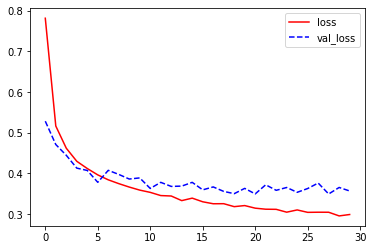

In [25]:
plt.plot(history.epoch, history.history['loss'], 'r', label='loss')
plt.plot(history.epoch, history.history['val_loss'], 'b--', label='val_loss')
plt.legend()

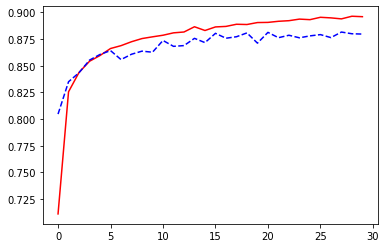

In [26]:
plt.plot(history.epoch, history.history['accuracy'], 'r')
plt.plot(history.epoch, history.history['val_accuracy'], 'b--')